In [1]:
import pandas as pd

# Đọc dữ liệu từ file all_labeled.json
df = pd.read_json('all_labeled.json')

# Hiển thị thông tin tổng quan về dataframe
print("Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nInfo:")
print(df.info())
print("\nMissing values per column:")
print(df.isnull().sum())
print("\nSample data:")
print(df.head())

Shape: (2262, 19)

Columns: ['id', 'annotations', 'file_upload', 'drafts', 'predictions', 'data', 'meta', 'created_at', 'updated_at', 'inner_id', 'total_annotations', 'cancelled_annotations', 'total_predictions', 'comment_count', 'unresolved_comment_count', 'last_comment_updated_at', 'project', 'updated_by', 'comment_authors']

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2262 entries, 0 to 2261
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   id                        2262 non-null   int64              
 1   annotations               2262 non-null   object             
 2   file_upload               2262 non-null   object             
 3   drafts                    2262 non-null   object             
 4   predictions               2262 non-null   object             
 5   data                      2262 non-null   object             
 6   meta            

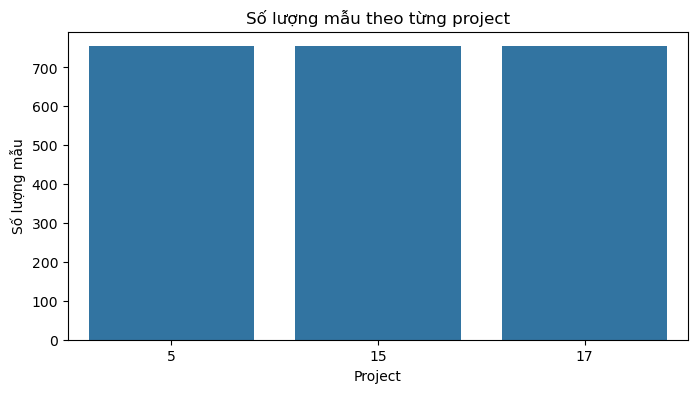

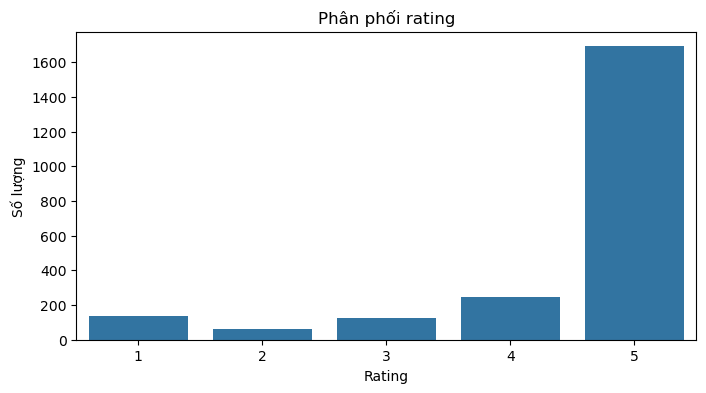

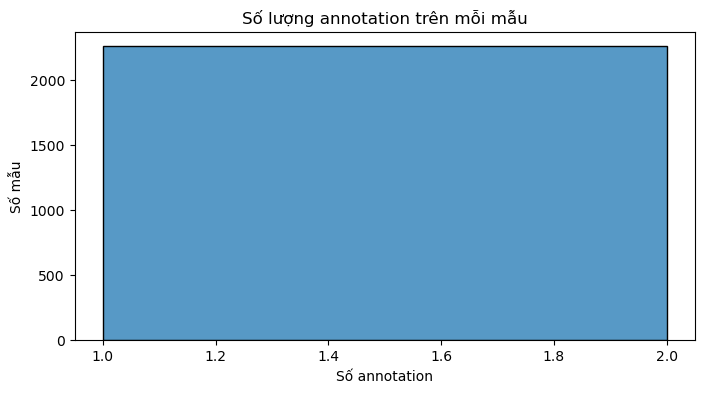

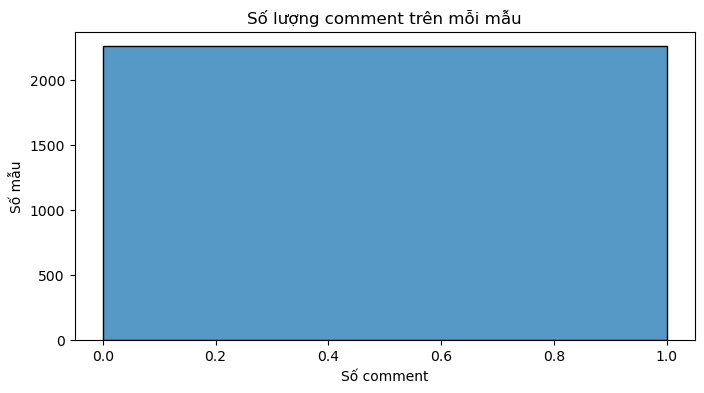

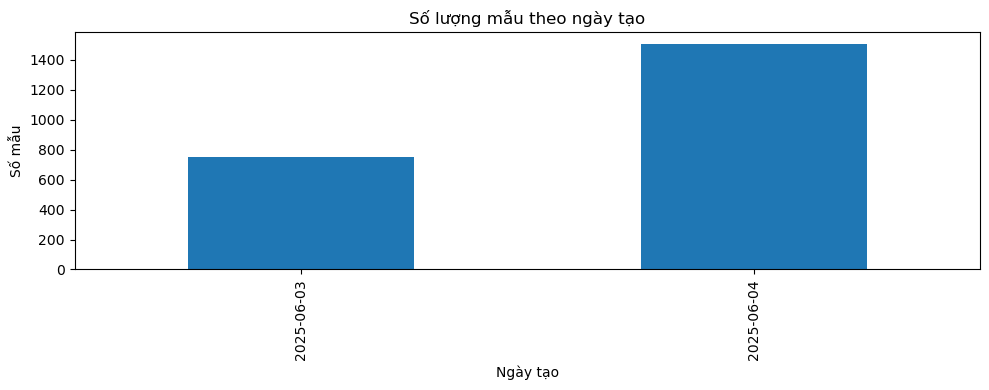

In [2]:
import seaborn as sns

import matplotlib.pyplot as plt

# 1. Thống kê số lượng mẫu theo từng project
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='project')
plt.title('Số lượng mẫu theo từng project')
plt.xlabel('Project')
plt.ylabel('Số lượng mẫu')
plt.show()

# 2. Thống kê rating (nếu có trường rating trong df['data'])
if 'rating' in df['data'].iloc[0]:
    df['rating'] = df['data'].apply(lambda x: x.get('rating', None))
    plt.figure(figsize=(8,4))
    sns.countplot(data=df, x='rating')
    plt.title('Phân phối rating')
    plt.xlabel('Rating')
    plt.ylabel('Số lượng')
    plt.show()

# 3. Thống kê số lượng annotation trên mỗi mẫu
plt.figure(figsize=(8,4))
sns.histplot(df['total_annotations'], bins=range(1, df['total_annotations'].max()+2), kde=False)
plt.title('Số lượng annotation trên mỗi mẫu')
plt.xlabel('Số annotation')
plt.ylabel('Số mẫu')
plt.show()

# 4. Thống kê số lượng comment trên mỗi mẫu
plt.figure(figsize=(8,4))
sns.histplot(df['comment_count'], bins=range(0, df['comment_count'].max()+2), kde=False)
plt.title('Số lượng comment trên mỗi mẫu')
plt.xlabel('Số comment')
plt.ylabel('Số mẫu')
plt.show()

# 5. Thống kê thời gian tạo mẫu
plt.figure(figsize=(10,4))
df['created_at'].dt.date.value_counts().sort_index().plot(kind='bar')
plt.title('Số lượng mẫu theo ngày tạo')
plt.xlabel('Ngày tạo')
plt.ylabel('Số mẫu')
plt.tight_layout()
plt.show()

## EDA cho trường annotations
- Thống kê số lượng annotation trên mỗi mẫu, độ dài annotation, phân phối nhãn.

In [ ]:
# Số lượng annotation trên mỗi mẫu (đã có ở trên)
# Thống kê độ dài annotation (nếu có trường text trong annotation)
annotation_lengths = []
annotation_labels = []
for anns in df['annotations']:
    for ann in anns:
        # Nếu annotation có trường 'result'
        if 'result' in ann and isinstance(ann['result'], list):
            for res in ann['result']:
                # Nếu có trường 'value' và 'text'
                if 'value' in res and 'text' in res['value']:
                    annotation_lengths.append(len(res['value']['text']))
                # Nếu có trường 'labels'
                if 'value' in res and 'labels' in res['value']:
                    annotation_labels.extend(res['value']['labels'])

import numpy as np
if annotation_lengths:
    plt.figure(figsize=(8,4))
    sns.histplot(annotation_lengths, bins=30)
    plt.title('Độ dài annotation (số ký tự)')
    plt.xlabel('Số ký tự')
    plt.ylabel('Số annotation')
    plt.show()
else:
    print("Không có trường 'text' trong annotation.")

if annotation_labels:
    from collections import Counter
    label_counts = Counter(annotation_labels)
    plt.figure(figsize=(8,4))
    sns.barplot(x=list(label_counts.keys()), y=list(label_counts.values()))
    plt.title('Phân phối nhãn annotation')
    plt.xlabel('Label')
    plt.ylabel('Số lượng')
    plt.show()
else:
    print("Không có trường 'labels' trong annotation.")

## EDA cho trường comment
- Thống kê số lượng, độ dài, ví dụ comment.

In [ ]:
# Lấy comment từ trường data (nếu có)
def extract_comment(data):
    if isinstance(data, dict):
        return data.get('comment', None)
    return None

df['comment_text'] = df['data'].apply(extract_comment)
comment_texts = df['comment_text'].dropna().astype(str)
comment_lengths = comment_texts.apply(len)

if not comment_texts.empty:
    plt.figure(figsize=(8,4))
    sns.histplot(comment_lengths, bins=30)
    plt.title('Độ dài comment (số ký tự)')
    plt.xlabel('Số ký tự')
    plt.ylabel('Số comment')
    plt.show()
    print("Số lượng comment:", len(comment_texts))
    print("Ví dụ comment:")
    print(comment_texts.sample(5, random_state=42).tolist())
else:
    print("Không có comment trong dữ liệu.")

## EDA cho trường product_name
- Thống kê tần suất, ví dụ các giá trị product_name (nếu có).

In [ ]:
# Lấy product_name từ trường data (nếu có)
def extract_product_name(data):
    if isinstance(data, dict):
        return data.get('product_name', None)
    return None

df['product_name'] = df['data'].apply(extract_product_name)
product_names = df['product_name'].dropna().astype(str)

if not product_names.empty:
    top_products = product_names.value_counts().head(10)
    plt.figure(figsize=(10,4))
    sns.barplot(x=top_products.index, y=top_products.values)
    plt.title('Top 10 product_name phổ biến')
    plt.xlabel('Product Name')
    plt.ylabel('Số mẫu')
    plt.xticks(rotation=45)
    plt.show()
    print("Ví dụ product_name:", product_names.sample(5, random_state=42).tolist())
else:
    print("Không có trường product_name trong dữ liệu.")